In [1]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    
    print('start',map2d[xloc[0]][yloc[0]], 'Goal', map2d[xloc[1]][yloc[1]]  )
    print('start',xloc[0], yloc[0], 'Goal', xloc[1], yloc[1])
    

    return map2d

In [2]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

In [3]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # brown

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



In [4]:
# import numpy as np
import math
import heapq

# Priority Queue based on heapq
class PriorityQueue:
    def __init__(self):
        self.elements = []
    def isEmpty(self):
        return len(self.elements) == 0
    def add(self, priority, item):
        heapq.heappush(self.elements,(priority,item))
    def remove(self):
        return heapq.heappop(self.elements)

In [5]:
def get_neighbors(current, goal_position,map1, heuristic_type):
    x,y =current
    adjacent_cells=[]
    
    shift = [[-1, 0 ], # go up
            [ 0, -1], # go left
            [ 1, 0 ], # go down
            [ 0, 1 ]] # go right
    
    if heuristic_type=='manhattan':
        
        for i in range(len(shift)):
            x1 = x + shift[i][0]
            y1 = y + shift[i][1]
            distx= abs(goal_position[0] -x1)
            disty= abs(goal_position[1]-y1)
            heuristic= abs(distx) + abs(disty)
        
            #check if outside the boundary
            if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
                #move to adjacent cell if only its value is zero
                if map1[x1][y1] == 0 or map1[x1][y1] == -3 :
                    adjacent_cells.append((heuristic, (x1, y1)))
                
    elif heuristic_type=='euclidian':
        for i in range(len(shift)):
            x1 = x + shift[i][0]
            y1 = y + shift[i][1]
            distx= goal_position[0] -x1
            disty= goal_position[1]-y1
            heuristic= math.sqrt(distx**2 + disty**2)
        
            #check if outside the boundary
            if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
                #move to adjacent cell if only its value is zero
                if map1[x1][y1] == 0 or map1[x1][y1] == -3 :
                    adjacent_cells.append((heuristic, (x1, y1)))
                
    
    
    
    return adjacent_cells


In [6]:
# An example of search algorithm, feel free to modify and implement the missing part

def greedy_search(map1, heuristic_type):

    exp_map = np.copy(map1)
    for row in range(len(map1)):
        for column in range(len(map1)):
            if map1[row][column]==-2:
                xs, ys= row,column
                
            if map1[row][column]==-3:
                xg, yg= row,column
                
                
    
    start_position=(xs, ys)
    goal_position=(xg, yg)
    
    if heuristic_type=='manhattan':
        #heuristic = f(n)=h(n)
        distx= abs(goal_position[0]-start_position[0])
        disty= abs(goal_position[1]-start_position[1])
        heuristic= abs(distx) + abs(disty)
        
    elif heuristic_type=='euclidian':
        distx= goal_position[0]-start_position[0]
        disty= goal_position[1]-start_position[1]
        heuristic= math.sqrt(distx**2 + disty**2)
        
    
    # set to store visited cells
    visited=set()
    visited_value=(heuristic,start_position)
    
    visited.add(visited_value)
    
    # Boolean found if goal is reached
    found=False

    # priority queue
    frontier = PriorityQueue()
    
    # path taken
    came_from=dict()

    # add starting cell to priority queue
    frontier.add(heuristic, start_position)
    
    #cost is the total number of nodes expanded
    cost=0

    
    while not frontier.isEmpty():
        h_cost, current = frontier.remove()


        # check if the goal is reached
        if current == goal_position:
            found=True
            break
 
        # for each neighbour of the current cell return expanded adjacent cells
        # (avoid repetitions by using set visited)
        cells=get_neighbors(current,goal_position, map1, heuristic_type)
        for next1 in cells:
            if next1 not in visited:
                visited.add(next1)
                came_from[(xs,ys)]=tuple(current)
                heuristic,(x,y)=next1
                
                #increment cost
                cost+=1
                if exp_map[x][y]!=-3:exp_map[x][y]=cost

                # add next cell to priority list
                frontier.add(heuristic, (x,y)) ###Counter check which is the priority and item.
                
                #add to path
                came_from[(x,y)]=tuple(current)
    
    
    
    if found==False: 
        print("No path to goal")
        return -1
    else:
        a,b=goal_position
        goal_position2=b,a
        reverse_path = [goal_position2]
        while tuple(goal_position) != tuple(start_position):
            goal_position = came_from[tuple(goal_position)]
            x2,y2=goal_position
            reverse_path.append((y2,x2))
            path2=list(reversed(reverse_path))
        
        path1=np.array(path2)
        plotMap(map1)
        plotMap(exp_map, path1,'path')
        return cost, len(path1)

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 33 40 Goal 2 48


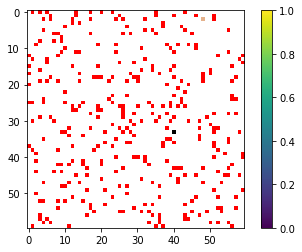

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


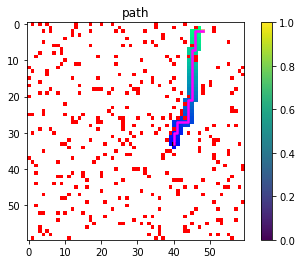

(98, 40)

In [7]:
map1 = generateMap2d([60, 60])
greedy_search(map1, 'manhattan')

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 45 41 Goal 41 50


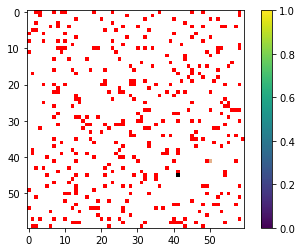

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


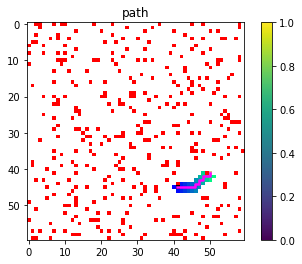

(32, 14)

In [8]:
map1 = generateMap2d([60, 60])
greedy_search(map1, 'euclidian')

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

start -2.0 Goal -3.0
start 53 13 Goal 32 45


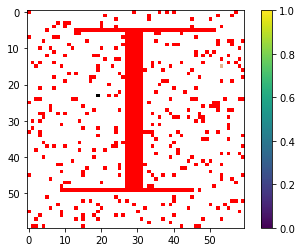

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


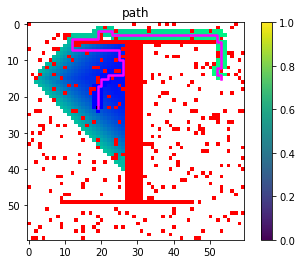

(633, 99)

In [9]:
map2, info=generateMap2d_obstacle([60, 60])
greedy_search(map2,'manhattan')

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

start -2.0 Goal -3.0
start 58 29 Goal 11 29


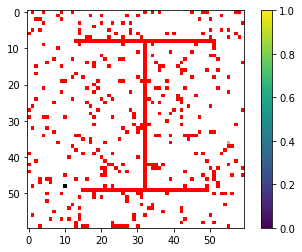

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


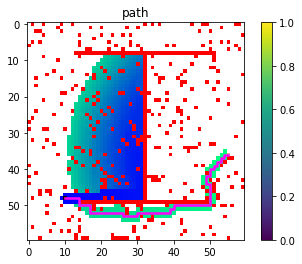

(813, 70)

In [10]:
map2, info=generateMap2d_obstacle([60, 60])
greedy_search(map2,'euclidian')

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 55 41 Goal 23 52


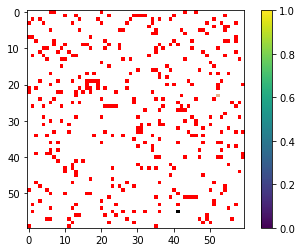

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


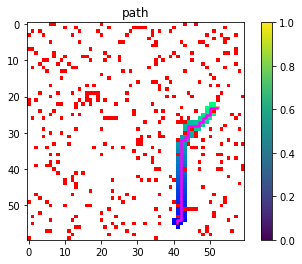

start -2.0 Goal -3.0
start 42 51 Goal 59 14


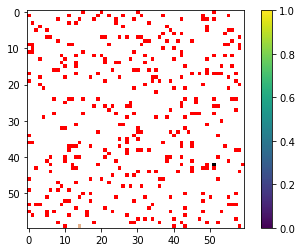

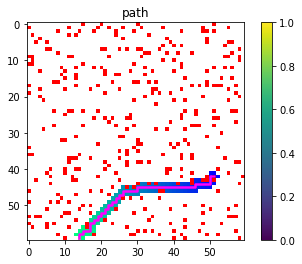

start -2.0 Goal -3.0
start 47 49 Goal 59 34


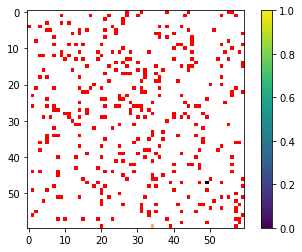

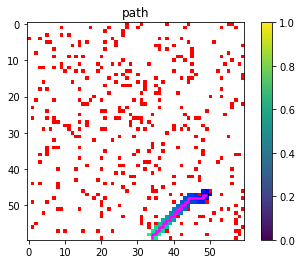

start -2.0 Goal -3.0
start 30 50 Goal 42 54


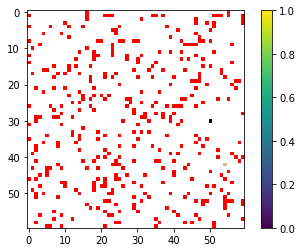

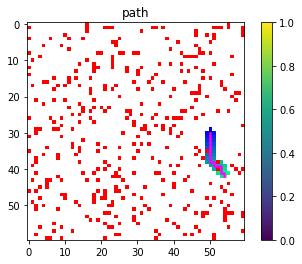

start -2.0 Goal -3.0
start 18 2 Goal 55 17


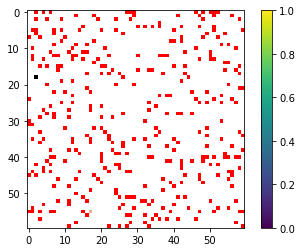

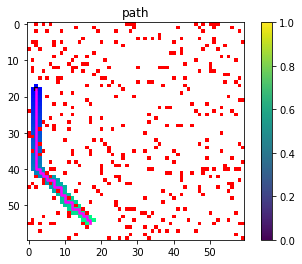

start -2.0 Goal -3.0
start 56 24 Goal 5 27


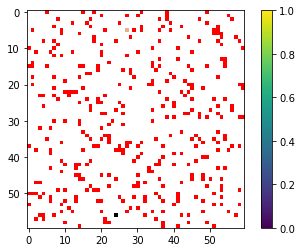

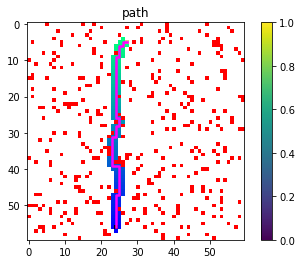

start -2.0 Goal -3.0
start 51 19 Goal 34 15


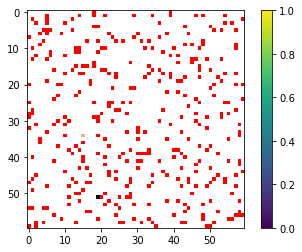

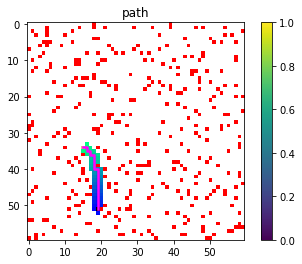

start -2.0 Goal -3.0
start 40 56 Goal 48 52


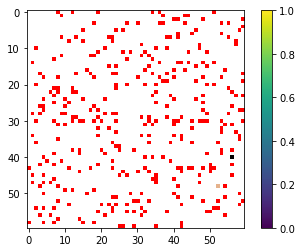

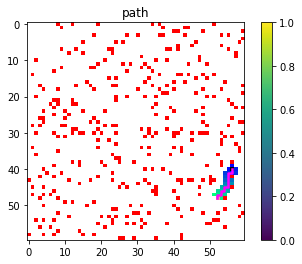

start -2.0 Goal -3.0
start 13 39 Goal 34 0


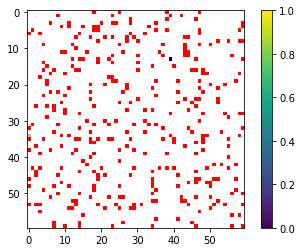

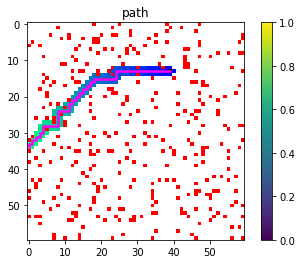

start -2.0 Goal -3.0
start 47 56 Goal 42 46


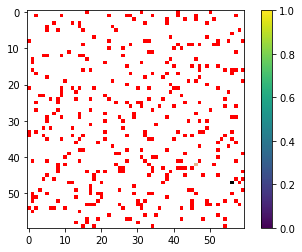

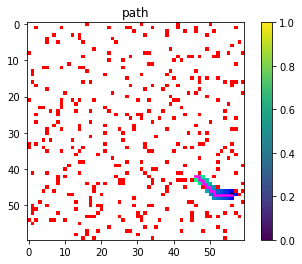

start -2.0 Goal -3.0
start 50 50 Goal 10 38


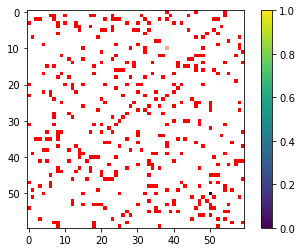

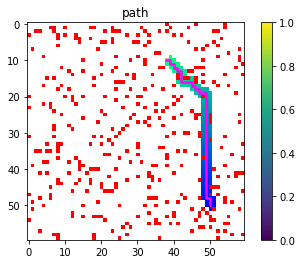

start -2.0 Goal -3.0
start 41 34 Goal 4 47


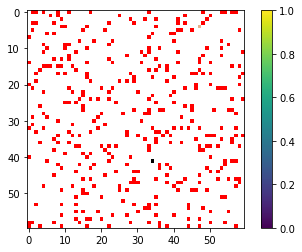

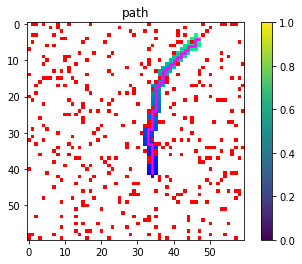

start -2.0 Goal -3.0
start 42 45 Goal 3 3


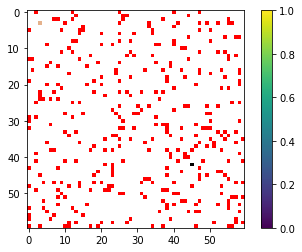

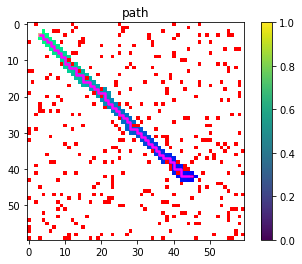

start -2.0 Goal -3.0
start 28 46 Goal 50 43


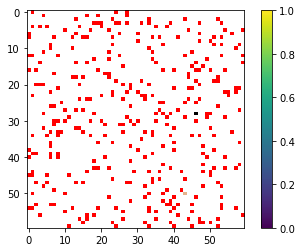

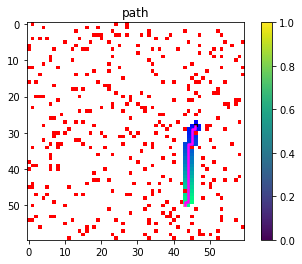

start -2.0 Goal -3.0
start 3 59 Goal 12 13


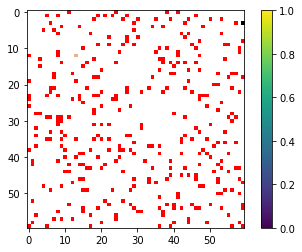

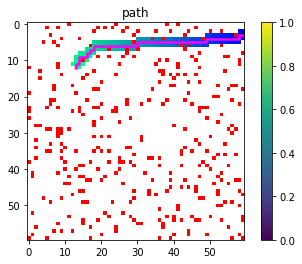

start -2.0 Goal -3.0
start 48 43 Goal 30 24


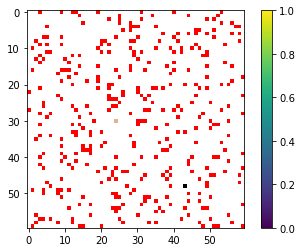

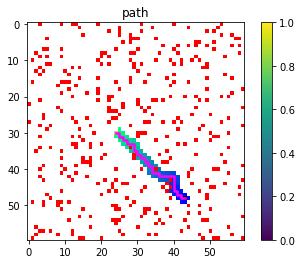

start -2.0 Goal -3.0
start 31 13 Goal 41 19


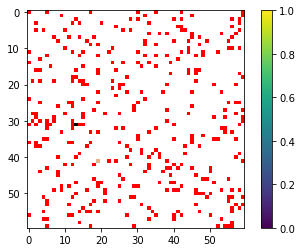

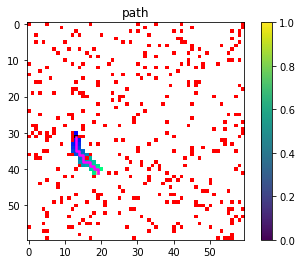

start -2.0 Goal -3.0
start 5 7 Goal 1 57


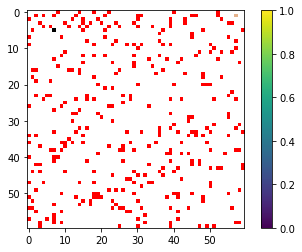

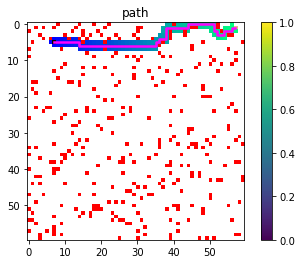

start -2.0 Goal -3.0
start 21 43 Goal 11 45


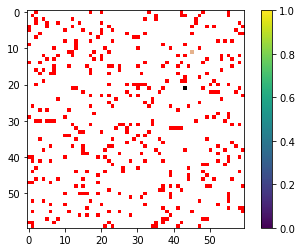

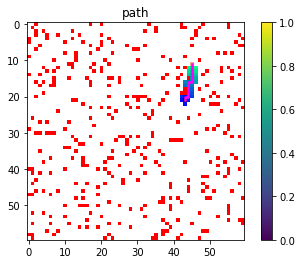

start -2.0 Goal -3.0
start 6 6 Goal 17 18


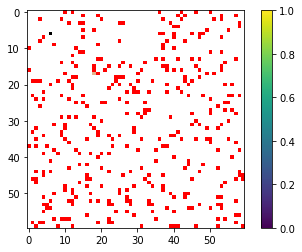

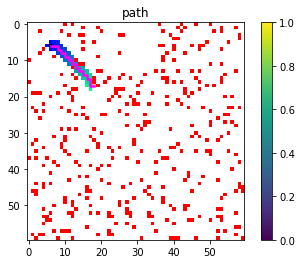

[106, 119, 58, 41, 122, 151, 56, 28, 139, 35, 128, 113, 163, 67, 139, 82, 36, 143, 30, 46]
[44, 55, 28, 17, 53, 61, 22, 13, 61, 16, 53, 53, 82, 26, 56, 38, 17, 63, 13, 24]
[0.6086878776550293, 0.6845793724060059, 0.603874921798706, 0.6114621162414551, 0.6729645729064941, 0.592475175857544, 0.6646487712860107, 0.6616494655609131, 0.6310148239135742, 0.6898822784423828, 0.6391973495483398, 0.619105339050293, 0.666710615158081, 0.5945761203765869, 0.5934000015258789, 0.6708207130432129, 0.602025032043457, 0.6714942455291748, 0.6094086170196533, 0.5996832847595215]
90.1
39.75
0.6343830347061157
45.414645214952415
20.24073862288627
0.03374718725703084


In [11]:
#Run the program 20 times Greedy search with Euclidean distance and No Obstacle
import time
import numpy
expanded_nodes=[]
path_length=[]
time_taken=[]

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    exp_cntr, path_greedy=greedy_search(map1, 'euclidian')
    stop=time.time()
    expanded_nodes.append(exp_cntr)
    path_length.append(path_greedy)
    timed=stop-start
    time_taken.append(timed)
    
expanded_nodes_mean= numpy.mean(expanded_nodes)
path_mean= numpy.mean(path_length)
time_mean= numpy.mean(time_taken)
expanded_nodes_std_dev = numpy.std(expanded_nodes)
path_mean_std_dev= numpy.std(path_length)
time_mean_std_dev= numpy.std(time_taken)

print(expanded_nodes)
print(path_length)
print(time_taken)
print(expanded_nodes_mean)
print(path_mean)
print(time_mean)
print(expanded_nodes_std_dev)
print(path_mean_std_dev)
print(time_mean_std_dev)



start -2.0 Goal -3.0
start 18 9 Goal 15 25


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


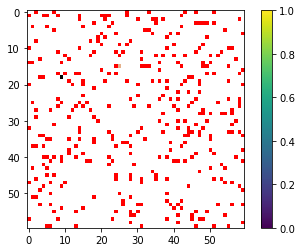

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


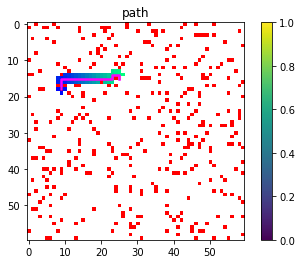

start -2.0 Goal -3.0
start 50 11 Goal 55 34


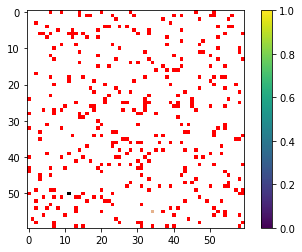

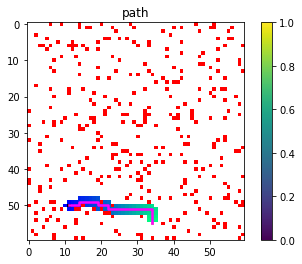

start -2.0 Goal -3.0
start 15 34 Goal 26 51


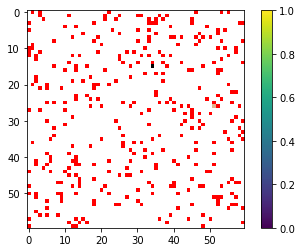

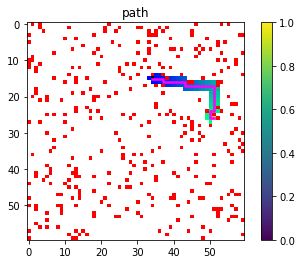

start -2.0 Goal -3.0
start 8 32 Goal 49 37


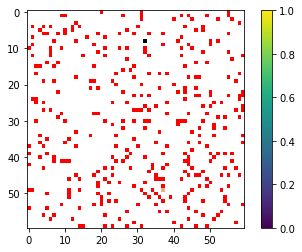

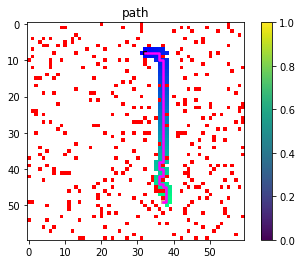

start -2.0 Goal -3.0
start 2 11 Goal 57 1


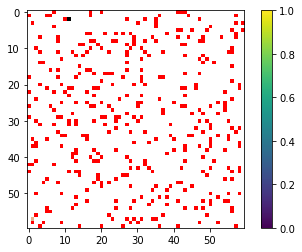

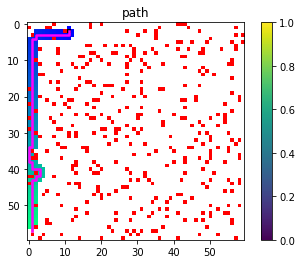

start -2.0 Goal -3.0
start 4 2 Goal 20 20


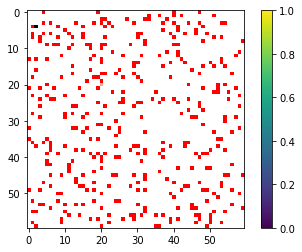

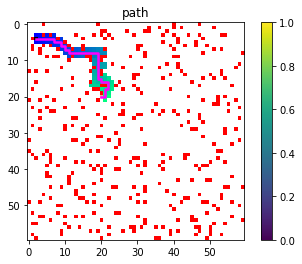

start -2.0 Goal -3.0
start 16 24 Goal 37 17


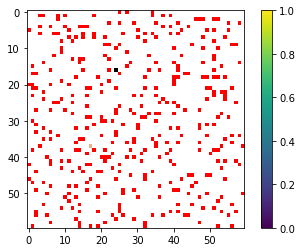

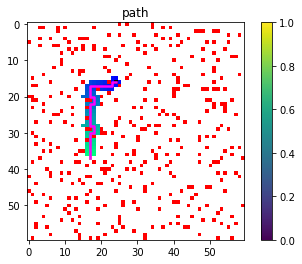

start -2.0 Goal -3.0
start 22 15 Goal 8 36


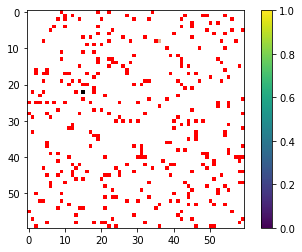

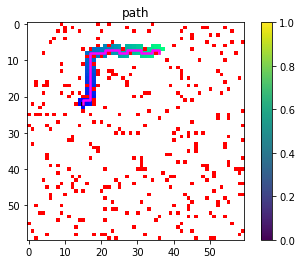

start -2.0 Goal -3.0
start 28 6 Goal 27 36


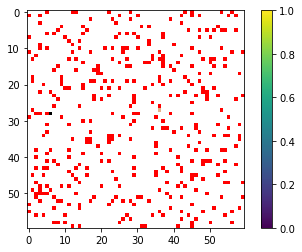

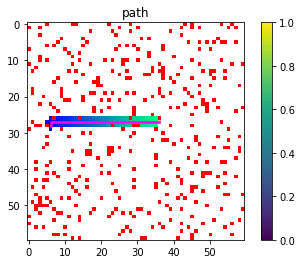

start -2.0 Goal -3.0
start 34 20 Goal 27 49


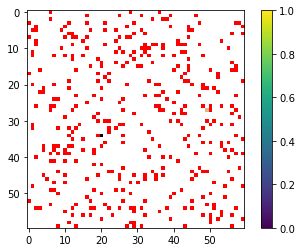

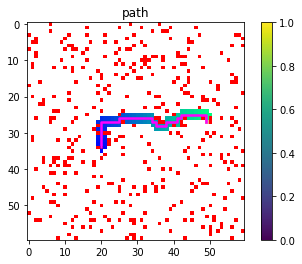

start -2.0 Goal -3.0
start 7 6 Goal 53 6


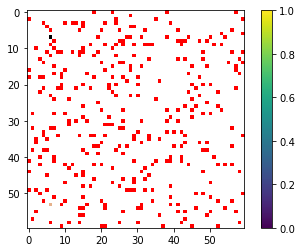

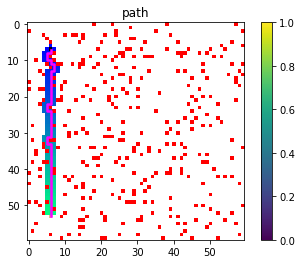

start -2.0 Goal -3.0
start 23 8 Goal 31 56


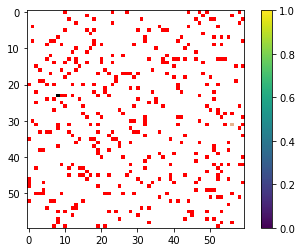

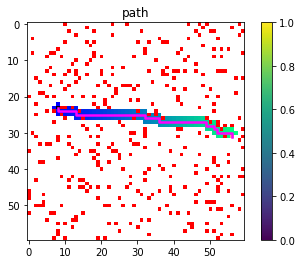

start -2.0 Goal -3.0
start 58 34 Goal 39 0


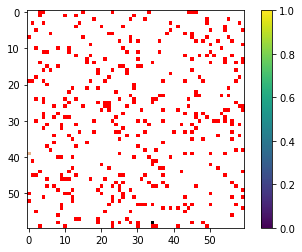

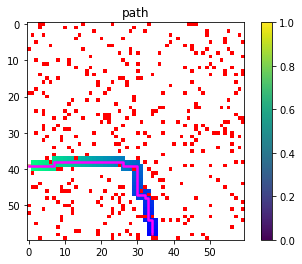

start -2.0 Goal -3.0
start 16 42 Goal 49 52


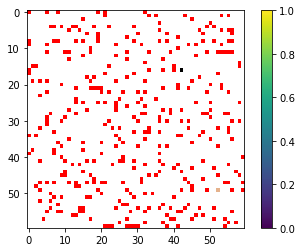

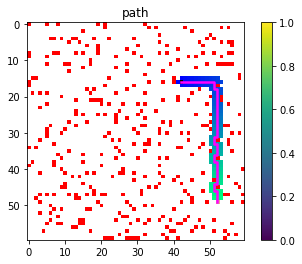

start -2.0 Goal -3.0
start 18 25 Goal 58 17


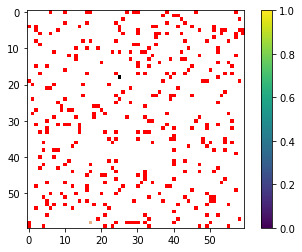

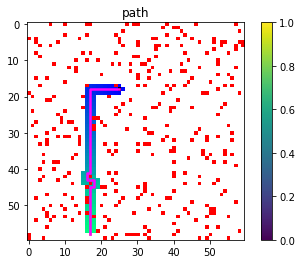

start -2.0 Goal -3.0
start 57 49 Goal 3 3


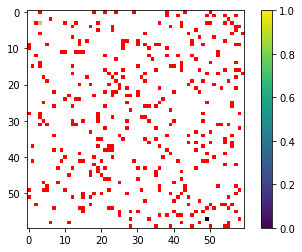

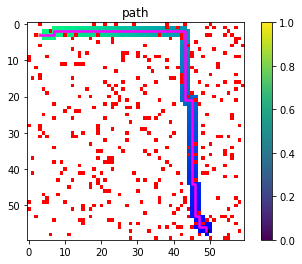

start -2.0 Goal -3.0
start 58 40 Goal 53 58


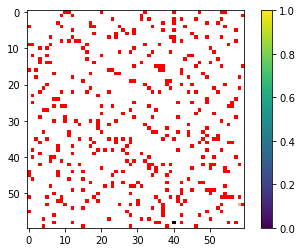

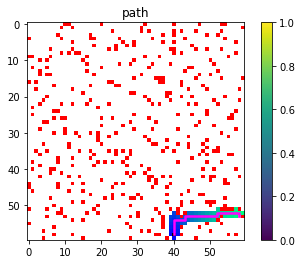

start -2.0 Goal -3.0
start 42 19 Goal 25 8


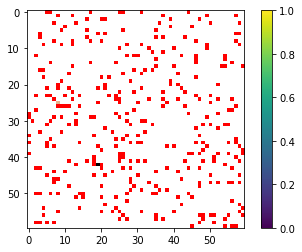

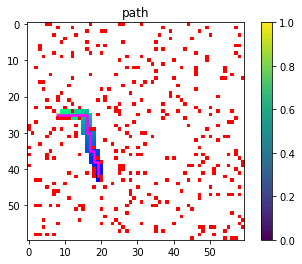

start -2.0 Goal -3.0
start 25 2 Goal 28 27


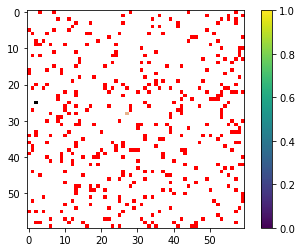

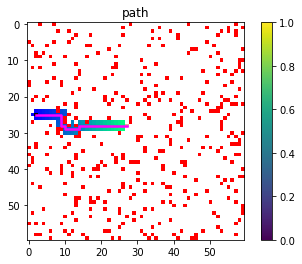

start -2.0 Goal -3.0
start 34 24 Goal 23 7


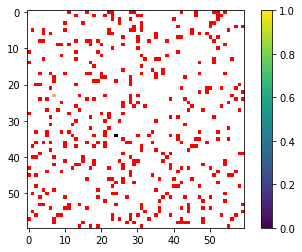

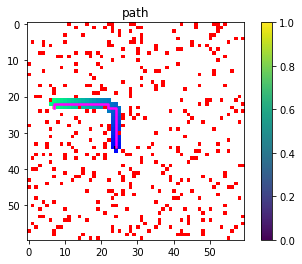

[56, 77, 74, 134, 179, 90, 80, 95, 86, 105, 127, 139, 146, 128, 140, 274, 64, 65, 79, 85]
[22, 31, 31, 53, 72, 39, 33, 42, 32, 45, 55, 57, 56, 50, 53, 103, 26, 29, 31, 31]
[0.6927456855773926, 0.606147289276123, 0.5962090492248535, 0.6722819805145264, 0.6013433933258057, 0.5994448661804199, 0.6776509284973145, 0.6024148464202881, 0.6736166477203369, 0.6021592617034912, 0.6005408763885498, 0.6765689849853516, 0.6412720680236816, 0.6297571659088135, 0.6969776153564453, 0.640129804611206, 0.6254854202270508, 0.666010856628418, 0.5991799831390381, 0.6598632335662842]
111.15
44.55
0.6379899978637695
49.5028029509441
18.567377305370837
0.035024095661543256


In [12]:
#Run the program 20 times Greedy search with Manhattan distance and No Obstacle
import time
import numpy
expanded_nodes=[]
path_length=[]
time_taken=[]

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    exp_cntr, path_greedy=greedy_search(map1, 'manhattan')
    stop=time.time()
    expanded_nodes.append(exp_cntr)
    path_length.append(path_greedy)
    timed=stop-start
    time_taken.append(timed)
    
expanded_nodes_mean= numpy.mean(expanded_nodes)
path_mean= numpy.mean(path_length)
time_mean= numpy.mean(time_taken)
expanded_nodes_std_dev = numpy.std(expanded_nodes)
path_mean_std_dev= numpy.std(path_length)
time_mean_std_dev= numpy.std(time_taken)

print(expanded_nodes)
print(path_length)
print(time_taken)
print(expanded_nodes_mean)
print(path_mean)
print(time_mean)
print(expanded_nodes_std_dev)
print(path_mean_std_dev)
print(time_mean_std_dev)



start -2.0 Goal -3.0
start 17 22 Goal 15 53


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

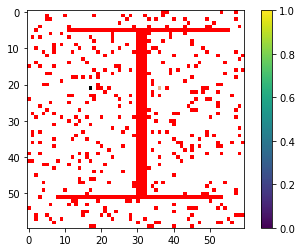

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


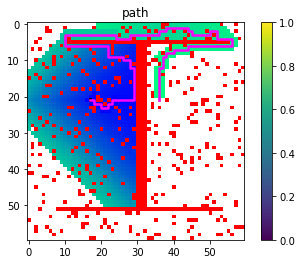

start -2.0 Goal -3.0
start 35 38 Goal 47 51


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


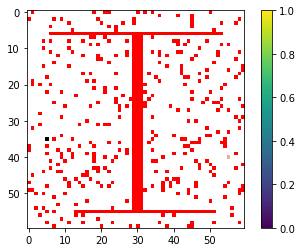

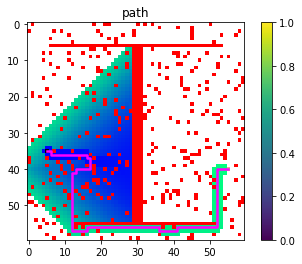

start -2.0 Goal -3.0
start 52 30 Goal 25 5


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


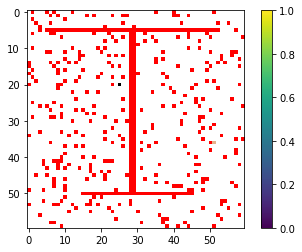

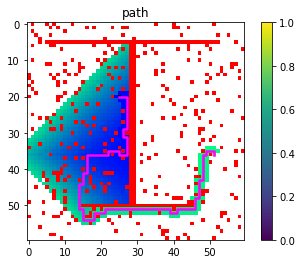

start -2.0 Goal -3.0
start 40 2 Goal 52 54


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


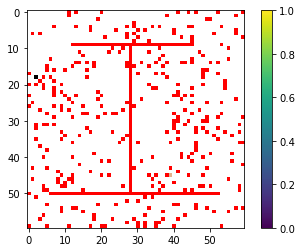

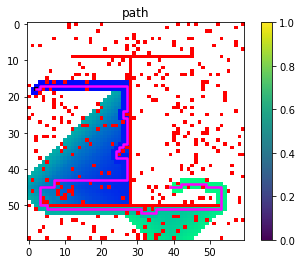

start -2.0 Goal -3.0
start 58 9 Goal 52 51


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


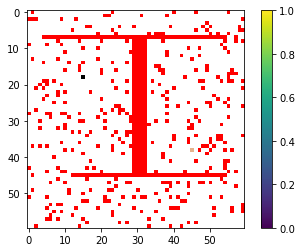

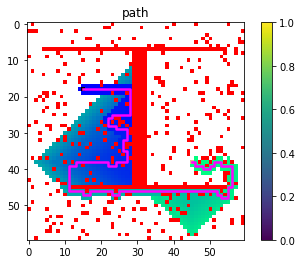

start -2.0 Goal -3.0
start 27 32 Goal 31 12


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 48 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 48 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


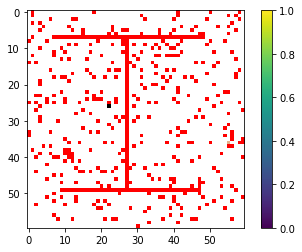

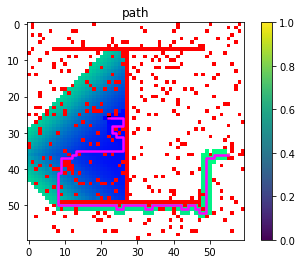

start -2.0 Goal -3.0
start 20 47 Goal 0 17


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


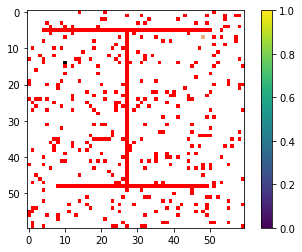

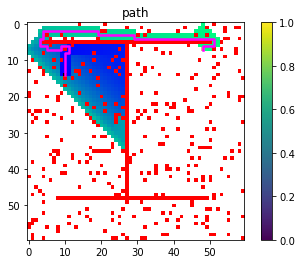

start -2.0 Goal -3.0
start 55 54 Goal 25 54


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 46 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 46 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


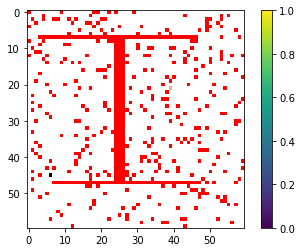

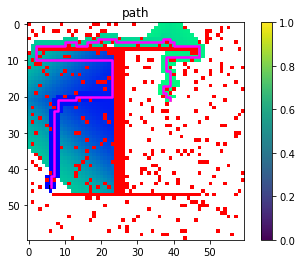

start -2.0 Goal -3.0
start 35 27 Goal 53 47


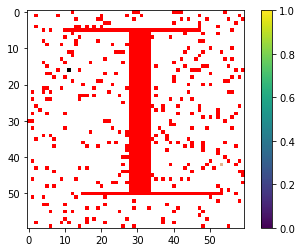

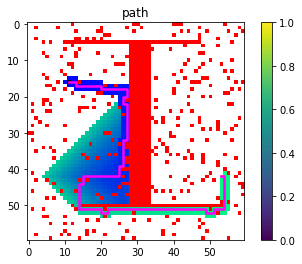

start -2.0 Goal -3.0
start 48 17 Goal 4 11


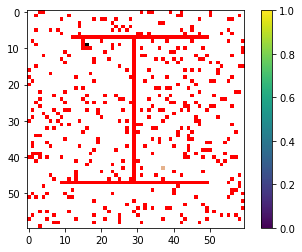

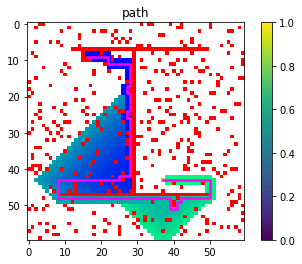

start -2.0 Goal -3.0
start 0 40 Goal 30 43


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


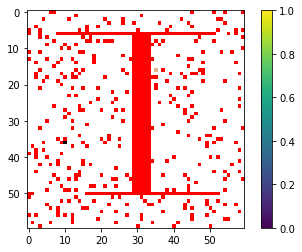

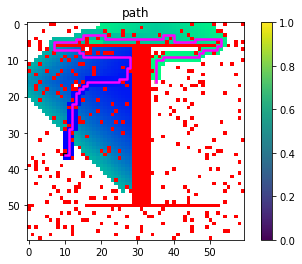

start -2.0 Goal -3.0
start 35 14 Goal 58 3


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


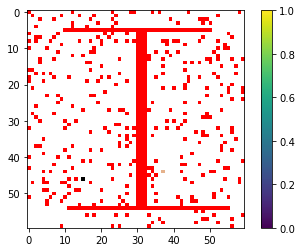

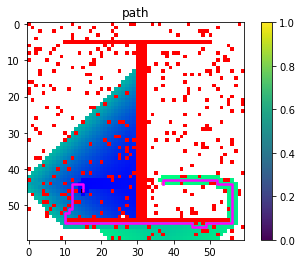

start -2.0 Goal -3.0
start 56 22 Goal 38 22


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


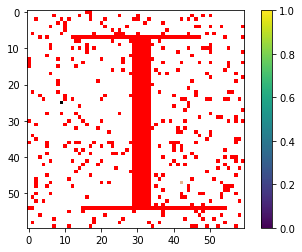

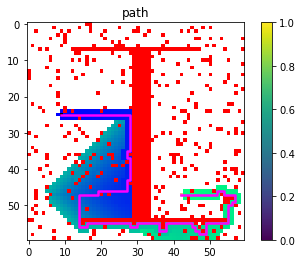

start -2.0 Goal -3.0
start 3 23 Goal 46 31


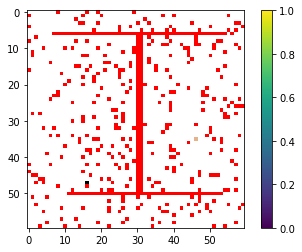

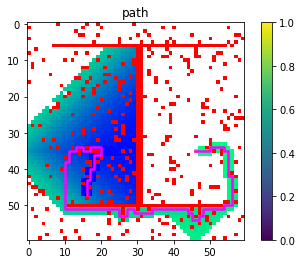

start -2.0 Goal -3.0
start 25 56 Goal 55 48


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


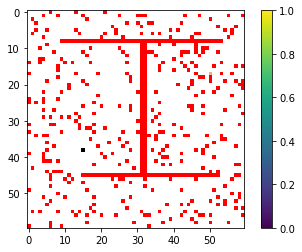

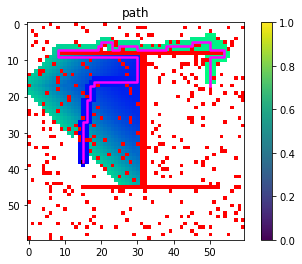

start -2.0 Goal -3.0
start 5 32 Goal 17 9


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


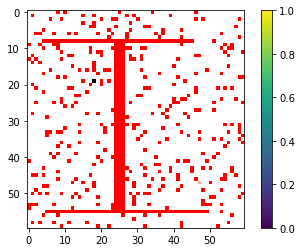

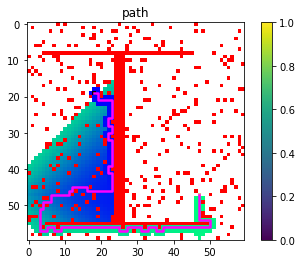

start -2.0 Goal -3.0
start 26 38 Goal 12 35


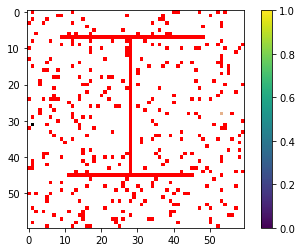

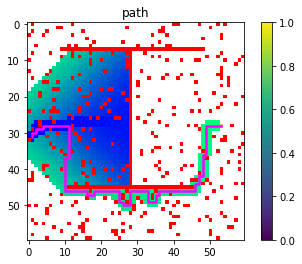

start -2.0 Goal -3.0
start 18 57 Goal 13 8


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 52 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 52 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


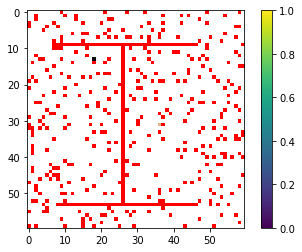

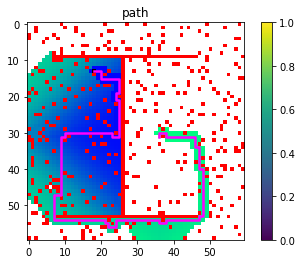

start -2.0 Goal -3.0
start 12 2 Goal 5 21


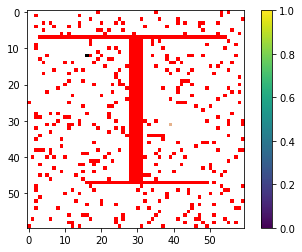

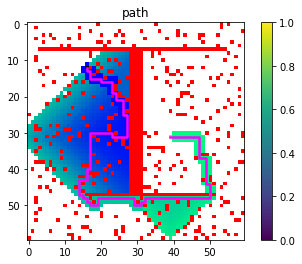

start -2.0 Goal -3.0
start 17 40 Goal 12 9


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


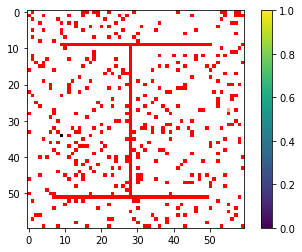

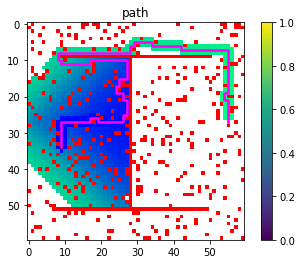

[1251, 1026, 881, 882, 730, 908, 533, 1017, 566, 717, 1007, 946, 663, 1137, 866, 739, 1008, 1217, 949, 1095]
[146, 102, 113, 167, 149, 124, 80, 160, 121, 142, 154, 99, 148, 133, 139, 140, 110, 155, 135, 148]
[0.6613705158233643, 0.6333928108215332, 0.6896250247955322, 0.6323492527008057, 0.6281476020812988, 0.7051990032196045, 0.6151332855224609, 0.6296355724334717, 0.6802310943603516, 0.6147115230560303, 0.7119736671447754, 0.6331284046173096, 0.6300740242004395, 0.7071177959442139, 0.6313793659210205, 0.6252350807189941, 0.7094292640686035, 0.6695339679718018, 0.648827314376831, 0.7392795085906982]
906.9
133.25
0.659788703918457
195.8003830435477
22.286486937155438
0.037626437945744357


In [13]:
#Run the program 20 times Greedy search with manhattan distance with Obstacle
import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]

for i in range(20):
    map3, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    exp_obstacle_nodes, path_greedy=greedy_search(map3, 'manhattan')
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes)
    path_obstacle_taken.append(path_greedy)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)



start -2.0 Goal -3.0
start 5 56 Goal 14 37


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

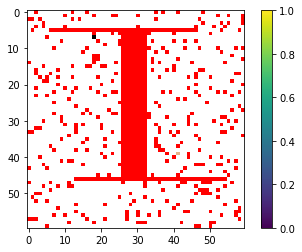

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3541126588.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


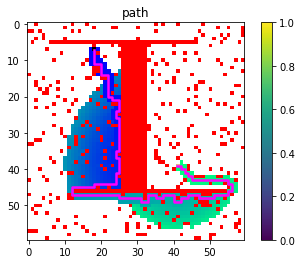

start -2.0 Goal -3.0
start 11 47 Goal 55 45


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


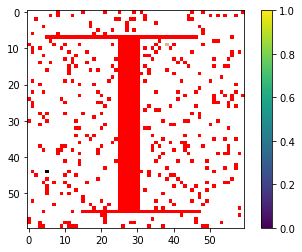

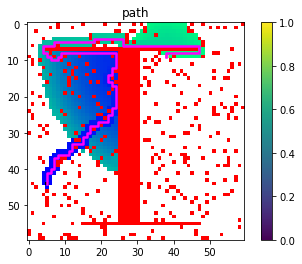

start -2.0 Goal -3.0
start 31 38 Goal 21 26


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


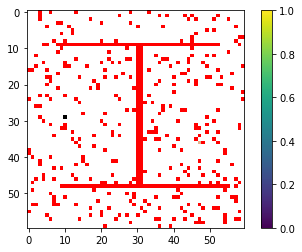

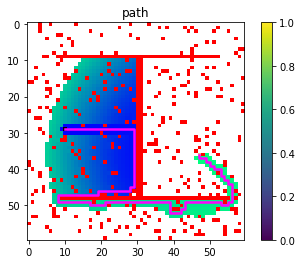

start -2.0 Goal -3.0
start 7 5 Goal 59 31


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


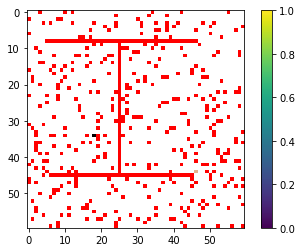

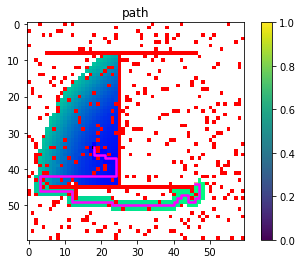

start -2.0 Goal -3.0
start 48 48 Goal 31 10


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


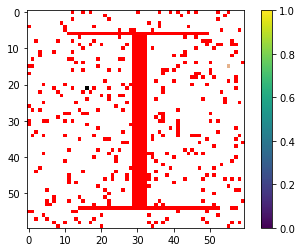

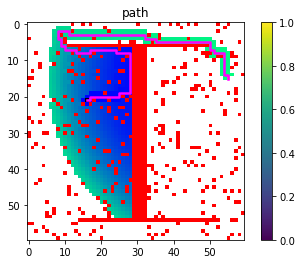

start -2.0 Goal -3.0
start 27 38 Goal 30 0


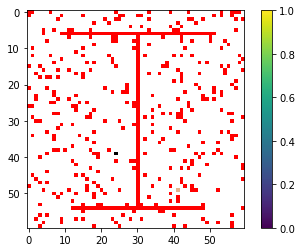

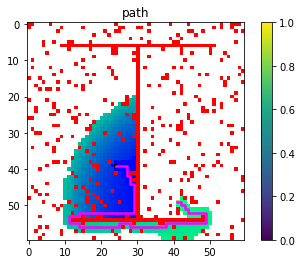

start -2.0 Goal -3.0
start 5 8 Goal 18 38


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


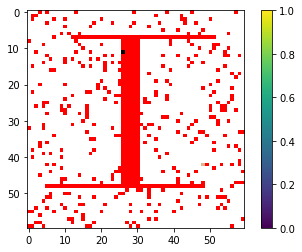

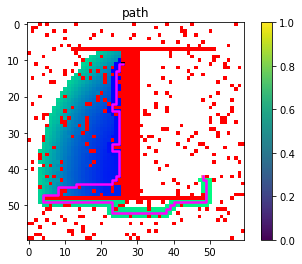

start -2.0 Goal -3.0
start 3 21 Goal 59 10


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


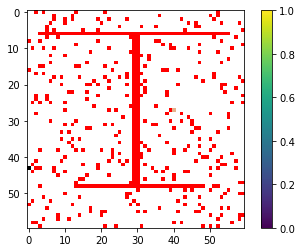

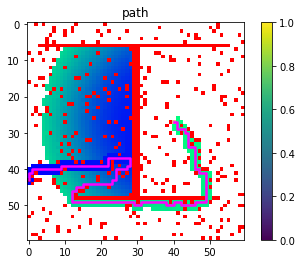

start -2.0 Goal -3.0
start 35 7 Goal 35 2


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


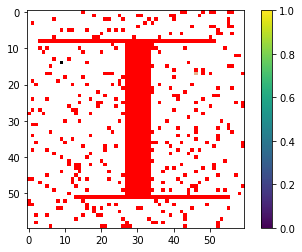

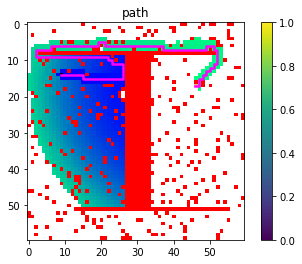

start -2.0 Goal -3.0
start 10 1 Goal 51 0


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


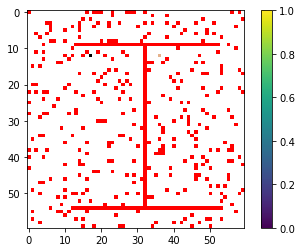

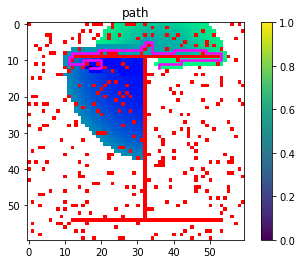

start -2.0 Goal -3.0
start 30 43 Goal 55 29


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


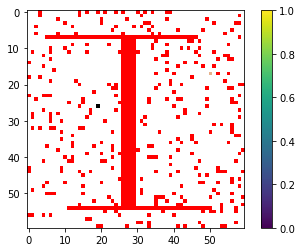

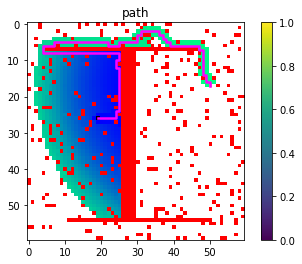

start -2.0 Goal -3.0
start 27 7 Goal 37 51


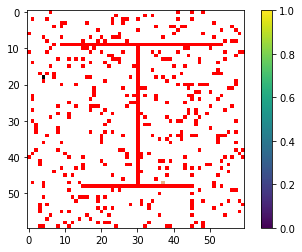

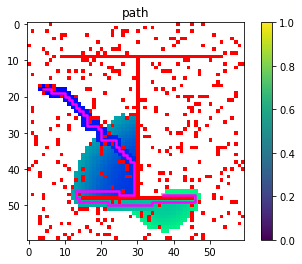

start -2.0 Goal -3.0
start 19 27 Goal 6 45


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 52 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 52 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


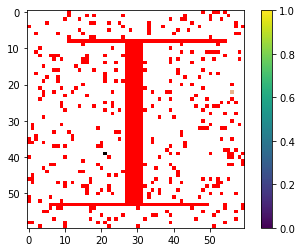

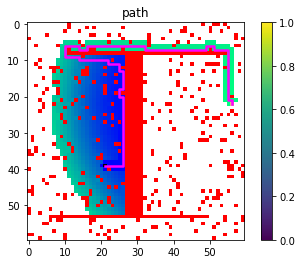

start -2.0 Goal -3.0
start 54 11 Goal 23 28


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


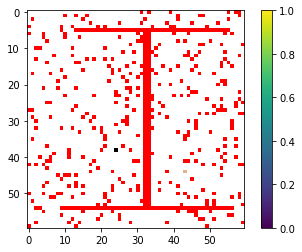

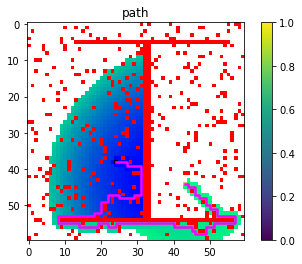

start -2.0 Goal -3.0
start 50 55 Goal 59 58


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


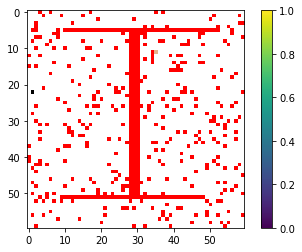

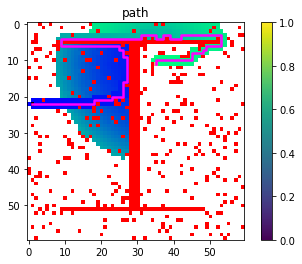

start -2.0 Goal -3.0
start 5 19 Goal 41 53


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 46 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 46 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


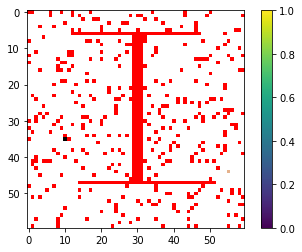

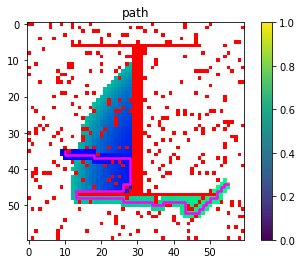

start -2.0 Goal -3.0
start 6 41 Goal 53 54


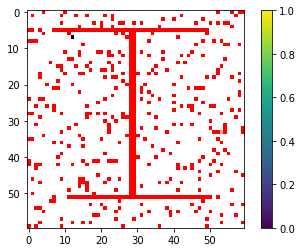

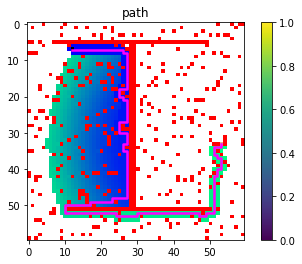

start -2.0 Goal -3.0
start 45 13 Goal 52 0


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 48 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 48 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


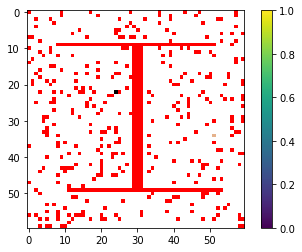

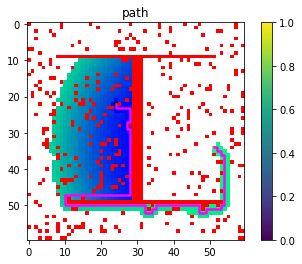

start -2.0 Goal -3.0
start 25 6 Goal 33 39


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


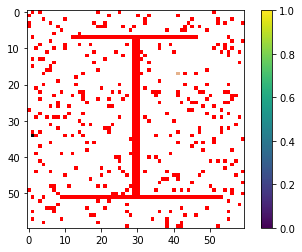

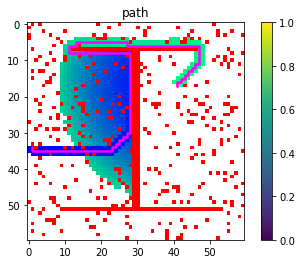

start -2.0 Goal -3.0
start 48 22 Goal 40 36


C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 48 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_19812\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 48 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


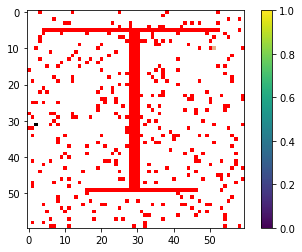

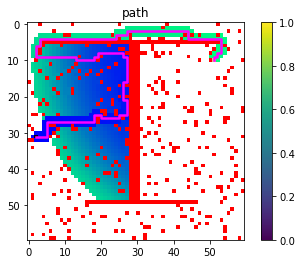

[645, 711, 958, 694, 933, 618, 804, 1029, 1030, 743, 974, 509, 844, 1046, 735, 531, 953, 864, 735, 989]
[144, 145, 141, 99, 114, 96, 128, 137, 123, 90, 117, 121, 123, 134, 138, 103, 158, 124, 130, 149]
[0.6875748634338379, 0.6998844146728516, 0.6268863677978516, 0.6311357021331787, 0.710284948348999, 0.6204452514648438, 0.6319811344146729, 0.7202084064483643, 0.6408004760742188, 0.6340765953063965, 0.7038114070892334, 0.6183946132659912, 0.7051687240600586, 0.6355202198028564, 0.6332933902740479, 0.6935124397277832, 0.6220095157623291, 0.6219668388366699, 0.6915698051452637, 0.6301121711730957]
817.25
125.7
0.6579318642616272
164.78163580933403
18.07788704467422
0.03650009911805748


In [14]:
#Run the program 20 times Greedy search with eclidian distance with Obstacle

import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]

for i in range(20):
    map4, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    exp_obstacle_nodes1, path_greedy=greedy_search(map4,'euclidian')
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes1)
    path_obstacle_taken.append(path_greedy)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)